In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.model_selection import train_test_split
sb.set() # set the default Seaborn style for graphics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder #imported all for testing
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import mean_squared_error, r2_score

TEST_SIZE = 0.2

In [2]:
# # # # 40000 COLUMNS
# import data
csv_data = pd.read_csv('../data/Road Accident Data.csv', low_memory=False)
# # print(csv_data)

# clean up typo in data
# # print()
csv_data['Accident_Severity'] = csv_data['Accident_Severity'].replace(['Fetal'], ['Fatal'])

# extracting out rows that we want to look at
# # print()
working_data = pd.DataFrame(csv_data[['Weather_Conditions', 'Light_Conditions', 'Road_Type', 'Time', 'Urban_or_Rural_Area','Accident_Severity']])

col = 'Accident_Severity'
unique_values = working_data[col].unique()

non_slight_data = working_data[working_data['Accident_Severity'] != "Slight"]
slight_data = working_data[working_data['Accident_Severity'] == "Slight"]

col = 'Accident_Severity'
unique_values = non_slight_data[col].unique()

unique_values = slight_data[col].unique()

slight_data = slight_data.sample(40000)

col = 'Accident_Severity'
unique_values = slight_data[col].unique()

combined_df = pd.concat([non_slight_data, slight_data], ignore_index=True)
combined_df = combined_df.sample(frac=1)

col = 'Accident_Severity'
unique_values = combined_df[col].unique()

working_data.describe()




,Weather_Conditions,Light_Conditions,Road_Type,Time,Urban_or_Rural_Area,Accident_Severity
count,301916,307973,306439,307956,307973,307973
unique,8,5,5,1439,2,3
top,Fine no high winds,Daylight,Single carriageway,17:00,Urban,Slight
freq,244496,227286,230612,2933,198532,263280


In [3]:
data = combined_df.copy()  # Make a copy of the original DataFrame

X = data.drop('Accident_Severity', axis=1)
Y = data['Accident_Severity']

In [4]:
categorical_features = ['Weather_Conditions', 'Light_Conditions', 'Road_Type', 'Time', 'Urban_or_Rural_Area']
one_hot_encoder = OneHotEncoder()
preprocessor = ColumnTransformer(transformers=[('cat', one_hot_encoder, categorical_features)], remainder='passthrough')
X_encoded = preprocessor.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y, test_size=TEST_SIZE, random_state=1)

In [6]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [7]:
print(model.coef_.shape)  # This should output something like (1, n_features)
print(X.shape[1]) 

(3, 1462)
5


In [8]:
y_pred = model.predict(X_test)

In [9]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.5343880984709841
Classification Report:
               precision    recall  f1-score   support

       Fatal       0.67      0.00      0.00       815
     Serious       0.53      0.55      0.54      8174
      Slight       0.54      0.58      0.56      7950

    accuracy                           0.53     16939
   macro avg       0.58      0.38      0.37     16939
weighted avg       0.54      0.53      0.52     16939

Confusion Matrix:
 [[   2  554  259]
 [   1 4463 3710]
 [   0 3363 4587]]


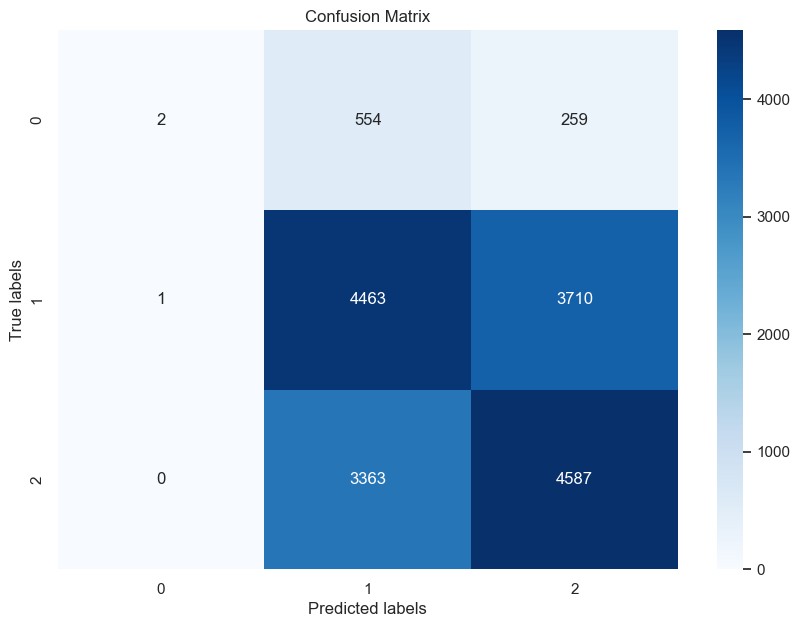

In [11]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sb.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()